### 결정트리

#### 결정트리 Graphviz

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [12]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [14]:
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

사이컷런의 결정 트리 알고리즘을 구현한 DecisionTreeClassifer를 제공해 결정 트리 모델의 학습과 예측을 수행할 수 있습니다.

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris_data.target_names,feature_names = iris_data.feature_names,impurity=True, filled=True)

In [29]:
import graphviz

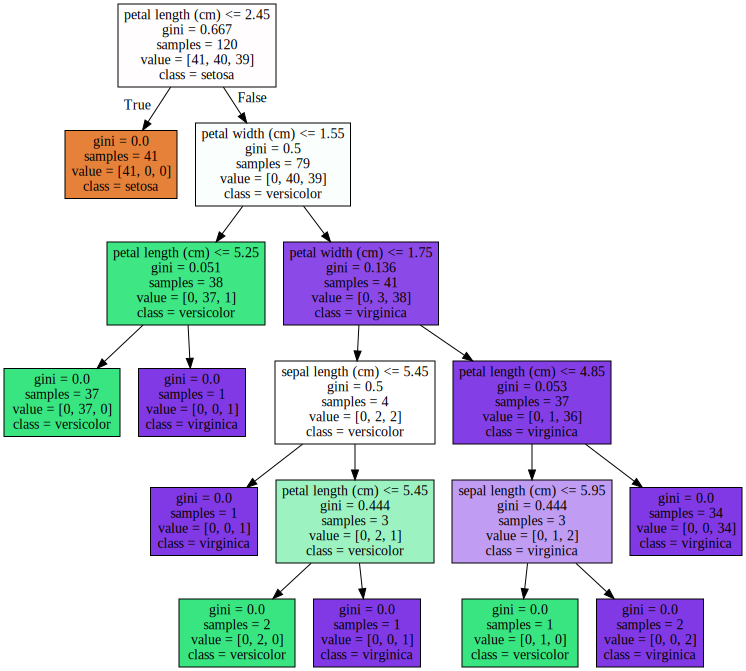

In [36]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* petal length <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로,  
없으면 리프노드 입니다.    
* gini : value = []로 주어진 데이터 분포에서의 지니 계수입니다.  
* samples : 현 규칙에 해당하는 데이터 건수입니다.  
* value = [ ]는 클래스 값 기반의 데이터 건수입니다. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지며  
0 : setosa, 1 : versicolor, 2 : virginica으로, 만일 value = [ 41, 40, 39 ]라면 클래스 값의 순서로   
각각 데이터가 41개, 40개, 39개로 구성되있는 것을 의미합니다.

* setosa, versicolor, virginica는 각각 주황색, 초록색, 보라색을 나타내며, 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미입니다. 

* Graphviz를 이용한 결정 트리 알고리즘 규칙 생성 트리를 시각적으로 살펴보면 4번 노드에서 virginica가 1개가 존재해 완벽하기 구분하기 위해서 트리 노드를 계속해서 만들어가는데 이로 인해 매우 복잡한 규칙 트리가 만들어질 수 있으며 모델이 쉽게 과적합되는 문제가 발생할 수 있습니다.  
때문에 결정 트리 알고리즘에서 복잡한 트리가 생성되는 것을 막기 위해 하이퍼 파라미터를 사용 합니다.

하이퍼 파라미터
 - max_depth : 결정 트리의 최대 트리 깊이를 제어
 - min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 갯수
 - min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정.

Feature importances:
{0} [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

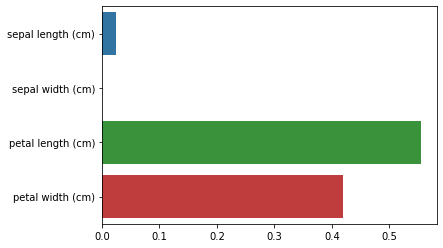

In [41]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}',format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공하며, 이는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됩니다.  
값이 높을수록 해당 피처의 중요도가 높다는 의미입니다.

#### 결정 트리 과적합